# A simple  python implementation of DFS using recursion

Asume we have a Graph class, where nodes are integers in 0..N-1
proving the primitive:
   Graph.get_neighbors

E. Viennet@USTH 03-2023


In [1]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from lib import load_karate
from lib.basic_graph_matrix import Graph_Matrix # our simple implementation

In [2]:
def recursive_dfs(g) -> list[tuple[int, int]]:
    """g is a graph"""
    explored = set()  # set of "explored" nodes
    current_node = 0
    dfs_edges = []  # list of edges in DFS Tree

    def dfs_from_node(u):
        print(f"visiting {u}")
        explored.add(u)  # mark u as "explored"
        # for each edge (u, v) incident to u:
        for v in g.get_neighbors(u):
            # if v is not marked as “explored”:
            if v not in explored:
                dfs_edges.append((u, v))
                dfs_from_node(v)
    # Start from node 0
    dfs_from_node(0)
    #
    return dfs_edges


In [3]:
g = load_karate()
dfs_edges = recursive_dfs(g)
print(f"{len(dfs_edges)} edges in DFS tree.")

visiting 0
visiting 1
visiting 2
visiting 3
visiting 7
visiting 12
visiting 13
visiting 33
visiting 8
visiting 30
visiting 32
visiting 14
visiting 15
visiting 18
visiting 20
visiting 22
visiting 23
visiting 25
visiting 24
visiting 27
visiting 31
visiting 28
visiting 29
visiting 26
visiting 9
visiting 19
visiting 17
visiting 21
visiting 4
visiting 6
visiting 5
visiting 10
visiting 16
visiting 11
33 edges in DFS tree.


In [4]:
print(dfs_edges)

[(0, 1), (1, 2), (2, 3), (3, 7), (3, 12), (3, 13), (13, 33), (33, 8), (8, 30), (30, 32), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23), (23, 25), (25, 24), (24, 27), (24, 31), (31, 28), (23, 29), (29, 26), (33, 9), (33, 19), (1, 17), (1, 21), (0, 4), (4, 6), (6, 5), (5, 10), (5, 16), (0, 11)]


In [5]:
g.get_neighbors(0)

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

In [6]:
# Given a graph G and a list of edges, plot the graph, with edges in the list in blue

def draw_graph_with_special_edges(g, special_edges):
    # Create a directed graph from the adjacency matrix
    nxgraph = nx.Graph()
    # Add nodes and edges to the graph
    for (i,j) in g.get_edges():
        nxgraph.add_edge(i, j)

    # Draw all edges in black by default
    normal_edges = [edge for edge in g.get_edges() if edge not in special_edges]
    # Compute nodes positions:
    # pos=nx.spring_layout(nxgraph, seed=12345)
    pos = nx.nx_pydot.pydot_layout(nxgraph, prog='neato', root=0)
    nx.draw_networkx_edges(nxgraph, pos=pos, edgelist=normal_edges, edge_color='gray', width=0.5)

    # Draw special edges in blue
    nx.draw_networkx_edges(nxgraph, pos=pos, edgelist=special_edges, edge_color='red',width=1.5)

    # Draw nodes
    nx.draw_networkx_nodes(nxgraph, pos=pos, node_color="#99CCFF")

    # Draw node labels
    nx.draw_networkx_labels(nxgraph, pos=pos, font_size=8)

    # Show the plot
    plt.show()

/var/folders/bp/0fyxbsps3vl1xzn10cg8srz40000gr/T/ipykernel_65140/1830098269.py:14: DeprecationWarning: nx.nx_pydot.pydot_layout depends on the pydot package, which hasknown issues and is not actively maintained.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.pydot_layout(nxgraph, prog='neato', root=0)


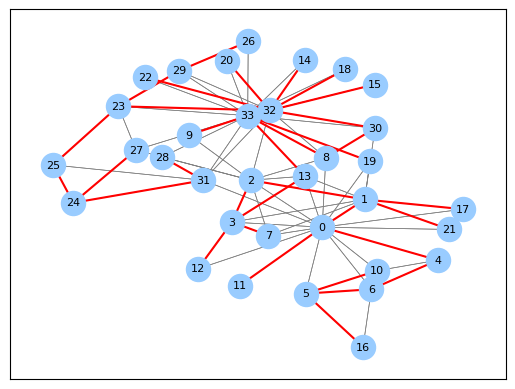

In [7]:
draw_graph_with_special_edges(g, dfs_edges)

## Exercice

Color the each graph node according to its **distance** to the starting node (node 0)

We give a modified drawing function, taking distance as an argument and plotting
the graph using a color palette for the nodes

In [8]:
def draw_graph_with_edges_and_colors(g, special_edges, node_distances):
    # Create a directed graph from the adjacency matrix
    nxgraph = nx.Graph()
    n = len(g.get_nodes())
    # Add nodes and edges to the graph
    for (i,j) in g.get_edges():
        nxgraph.add_edge(i, j)

    # Compute the color of each node:
    color_by_distance = {
        0: "black",
        1: "red",
        2:"blue",
        3:"green",
    }
    #node_color = [ color_by_distance.get(node_distances[i], "gray") for i in nxgraph ]
    node_color = [plt.cm.tab20(node_distances[i] % plt.cm.tab20.N) for i in nxgraph ]

    # Draw all edges in black by default
    normal_edges = [edge for edge in g.get_edges() if edge not in special_edges]
    # Compute nodes positions:
    # pos=nx.spring_layout(nxgraph, seed=12345)
    pos = nx.nx_pydot.pydot_layout(nxgraph, prog='neato', root=0)
    nx.draw_networkx_edges(nxgraph, pos=pos, edgelist=normal_edges, edge_color='gray', width=0.5)

    # Draw special edges in blue
    nx.draw_networkx_edges(nxgraph, pos=pos, edgelist=special_edges, edge_color='red',width=1.5)

    # Draw nodes
    nx.draw_networkx_nodes(nxgraph, pos=pos, node_color=node_color)

    # Draw node labels
    nx.draw_networkx_labels(nxgraph, pos=pos, font_size=8)

    # Show the plot
    plt.show()
    return node_color

...





## Your goal: modify  recursive_dfs to return distances to the staring node

replace the function `recursive_dfs(g)` given above by
`recursive_dfs_with_distances(g)`.

This function will return:
- the list of edges in DFS Tree `list[tuple[int, int]]`
- the distance of each node $u$ to the starting node (0): a dict `dict[int, int]]`

So the return type hint will be: `tuple[list[tuple[int, int]], dict[int, int]]`

In [9]:
def recursive_dfs_with_distances(g) -> list[tuple[int, int]]:
    """g is a graph"""

    # TODO MODIFY THIS FUNCTION

    explored = set()  # set of "explored" nodes
    current_node = 0
    dfs_edges = []  # list of edges in DFS Tree

    distances = {}  # NEW dict mapping node (int) to distance (int)

    def dfs_from_node(u): ### TODO
        print(f"visiting {u}")
        explored.add(u)  # mark u as "explored"
        # for each edge (u, v) incident to u:
        for v in g.get_neighbors(u):
            # if v is not marked as “explored”:
            if v not in explored:
                dfs_edges.append((u, v))
                dfs_from_node(v)

    # Start from node 0
    dfs_from_node(0)
    #
    return dfs_edges, distances # <<<
